<a href="https://colab.research.google.com/github/bhardwajshivam/Predicting-sarcasm-LSTM/blob/main/Sentiment_analysis_Sarcasm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 10000 #looking at the 10000 most frequent words
embedding_dim = 16 #dimension of our embeddings (vectors to indicate sarcasm)
max_length = 100 #maximum length of our sequence
trunc_type='post' #post truncation chops off the words from the end and takes the first max_length tokens
padding_type='post' #post padding converts all the letters before the sequence to zeroes: eg: [0,0,0,1,4,5,7]
oov_tok = "<OOV>" #used for unseen tokens
training_size = 20000

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json

--2024-01-08 23:13:00--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.207, 74.125.195.207, 172.253.117.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.07s   

2024-01-08 23:13:00 (78.5 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [4]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

# Creating train test data

In [5]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [6]:
training_sentences[:10]

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way',
 "advancing the world's women",
 'the fascinating case for eating lab-grown meat',
 'this ceo will send your kids to school, if you work for his company',
 'top snake handler leaves sinking huckabee campaign',
 "friday's morning email: inside trump's presser for the ages"]

In [7]:
training_labels[:10]

[0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

In [8]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok) # creating our tokenizer to convert words in our corpus to tokens
tokenizer.fit_on_texts(training_sentences) #fitting the tokenizer on traing text

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences) #generating sequences
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)#modified sequences

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [9]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

# Creating our neural network

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length), #learning the direction of each word epoch by epoch
    tf.keras.layers.GlobalAveragePooling1D(), #adding up the vectors
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 23s - loss: 0.6626 - accuracy: 0.5964 - val_loss: 0.5704 - val_accuracy: 0.8088 - 23s/epoch - 37ms/step
Epoch 2/30
625/625 - 4s - loss: 0.4233 - accuracy: 0.8318 - val_loss: 0.3807 - val_accuracy: 0.8392 - 4s/epoch - 6ms/step
Epoch 3/30
625/625 - 3s - loss: 0.3069 - accuracy: 0.8788 - val_loss: 0.3574 - val_accuracy: 0.8430 - 3s/epoch - 4ms/step
Epoch 4/30
625/625 - 2s - loss: 0.2563 - accuracy: 0.9003 - val_loss: 0.3544 - val_accuracy: 0.8429 - 2s/epoch - 4ms/step
Epoch 5/30
625/625 - 2s - loss: 0.2216 - accuracy: 0.9148 - val_loss: 0.3445 - val_accuracy: 0.8524 - 2s/epoch - 4ms/step
Epoch 6/30
625/625 - 3s - loss: 0.1942 - accuracy: 0.9265 - val_loss: 0.3525 - val_accuracy: 0.8517 - 3s/epoch - 5ms/step
Epoch 7/30
625/625 - 2s - loss: 0.1739 - accuracy: 0.9347 - val_loss: 0.3643 - val_accuracy: 0.8544 - 2s/epoch - 3ms/step
Epoch 8/30
625/625 - 2s - loss: 0.1537 - accuracy: 0.9439 - val_loss: 0.3843 - val_accuracy: 0.8509 - 2s/epoch - 3ms/step
Epoch 9/30
625/625 - 

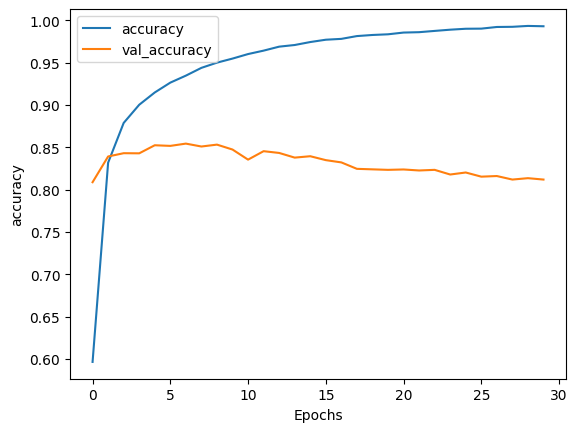

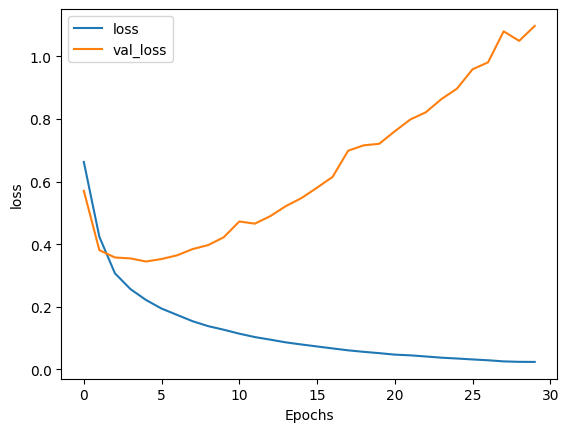

In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [14]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [15]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [16]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [17]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 101ms/step
[[9.264525e-01]
 [8.444821e-06]]


# Trying with LSTM

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          640000    
                                                                 
 bidirectional (Bidirection  (None, None, 128)         66048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 751489 (2.87 MB)
Trainable params: 75148

In [21]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
625/625 - 40s - loss: 0.3887 - accuracy: 0.8167 - val_loss: 0.3263 - val_accuracy: 0.8648 - 40s/epoch - 65ms/step
Epoch 2/10
625/625 - 14s - loss: 0.1901 - accuracy: 0.9254 - val_loss: 0.3610 - val_accuracy: 0.8551 - 14s/epoch - 22ms/step
Epoch 3/10
625/625 - 13s - loss: 0.1007 - accuracy: 0.9633 - val_loss: 0.4342 - val_accuracy: 0.8492 - 13s/epoch - 21ms/step
Epoch 4/10
625/625 - 14s - loss: 0.0561 - accuracy: 0.9811 - val_loss: 0.5132 - val_accuracy: 0.8398 - 14s/epoch - 22ms/step
Epoch 5/10
625/625 - 12s - loss: 0.0351 - accuracy: 0.9880 - val_loss: 0.7073 - val_accuracy: 0.8359 - 12s/epoch - 20ms/step
Epoch 6/10
625/625 - 12s - loss: 0.0216 - accuracy: 0.9932 - val_loss: 0.8952 - val_accuracy: 0.8399 - 12s/epoch - 20ms/step
Epoch 7/10
625/625 - 12s - loss: 0.0194 - accuracy: 0.9941 - val_loss: 0.7615 - val_accuracy: 0.8320 - 12s/epoch - 20ms/step
Epoch 8/10
625/625 - 13s - loss: 0.0136 - accuracy: 0.9953 - val_loss: 0.9253 - val_accuracy: 0.8374 - 13s/epoch - 21ms/step


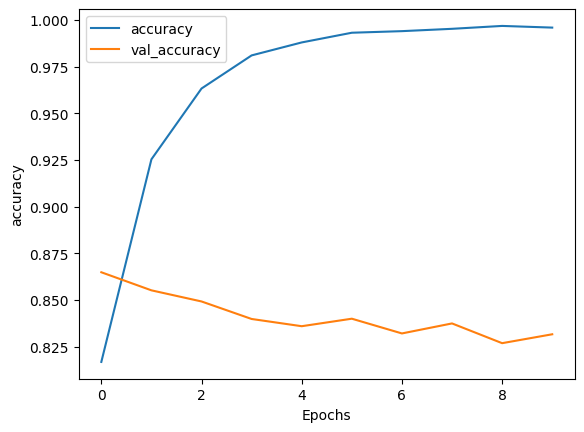

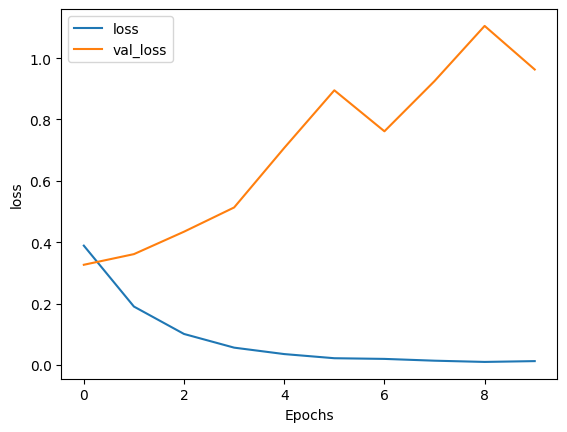

In [22]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [25]:
sentence = ["i am happy", "haha, the famous game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 25ms/step
[[3.3708307e-04]
 [9.5450044e-01]]
